In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
from sklearn.datasets import fetch_openml
import numpy as np
import math

In [26]:
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [27]:
X, y = mnist['data'], mnist['target']
print(X.shape, y.shape)

(70000, 784) (70000,)


In [28]:
X[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [76]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)


In [77]:
some_digit_image.shape

(28, 28)

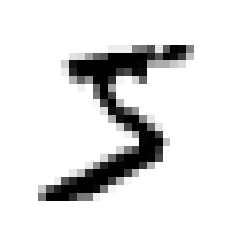

In [78]:
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [36]:
5 // 4, 5 % 4, 11 // 4, 11 % 4

(1, 1, 2, 3)

In [65]:
size = 20
subplot_number = math.ceil(np.sqrt(size))
subplot_number

5

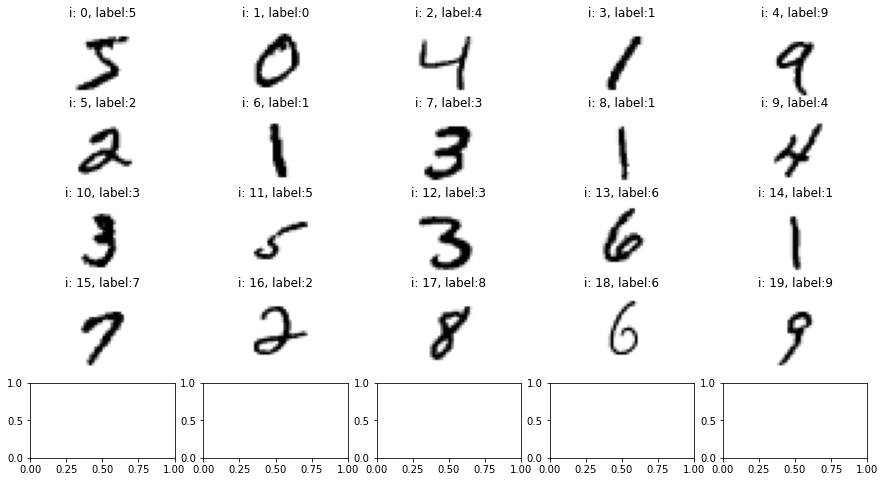

In [67]:


fig, axs = plt.subplots(subplot_number,subplot_number,figsize=(15,8))
#fig.figsize(16, 8)
for i in range(size):
    some_digit_ = X[i]
    i_ix = i // subplot_number 
    j_ix = i % subplot_number
    
    some_digit_image_ = some_digit_.reshape(28,28)
    axs[i_ix, j_ix].imshow(some_digit_image_, cmap="binary",)
    axs[i_ix, j_ix].axis("off")
    axs[i_ix, j_ix].title.set_text(f"i: {i}, label:{y[i]}")
    
    #axs[i_ix, i_ix].show()

In [22]:
y = y.astype(np.uint8)

# Split Train and Test 

In [23]:
X_train, X_test, Y_train, Y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Stratified KFlods 

In [80]:
Y_test_7 = (Y_test == 7)
Y_train_7 = (Y_train == 7)

In [86]:
sum(Y_test_7)/len(Y_test_7)

0.1028

In [87]:
sum(Y_train_7)/len(Y_train_7)

0.10441666666666667

In [81]:
from sklearn.model_selection import StratifiedKFold

In [89]:
for index_train, index_test in StratifiedKFold(n_splits= 4).split(X_train, Y_train_7):
    print(index_train, index_test, sum(Y_train_7[index_train])/len((Y_train_7[index_train])))

[14755 14757 14770 ... 59997 59998 59999] [    0     1     2 ... 15025 15026 15027] 0.10442222222222222
[    0     1     2 ... 59997 59998 59999] [14755 14757 14770 ... 30250 30259 30260] 0.10442222222222222
[    0     1     2 ... 59997 59998 59999] [29971 29972 29973 ... 45329 45333 45361] 0.10442222222222222
[    0     1     2 ... 45329 45333 45361] [44962 44963 44964 ... 59997 59998 59999] 0.1044


# Train a Binary Classifier 

In [68]:
from sklearn.linear_model import SGDClassifier

## Transform label in yes/no for binary classification 

In [69]:
(Y_train == 5)

array([ True, False, False, ...,  True, False, False])

In [71]:
[Y_train == 5 ]

[array([ True, False, False, ...,  True, False, False])]

In [70]:
type(Y_train)

numpy.ndarray

In [72]:
Y_train_5 = (Y_train == 5)

In [73]:
Y_test_5 = (Y_test == 5)

## Binary classifier : Stochastic Gradiant Descent 

In [74]:
sgd_cl = SGDClassifier(random_state=1234)
sgd_cl.fit(X_train, Y_train_5)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=1234, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [79]:
sgd_cl.predict([some_digit])

array([ True])

In [101]:
sgd_cl.predict(X_train[:5])

array([ True, False, False, False, False])

## Cross Validation 

In [90]:
from sklearn.model_selection import cross_val_score

In [92]:
cross_val_score(sgd_cl, X_train, Y_train_5, cv=3, scoring="accuracy")

array([0.96855, 0.95705, 0.96055])

## Stupid Classifier 

In [93]:
from sklearn.base import BaseEstimator, TransformerMixin

In [94]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)
        

In [99]:
np.zeros(10), np.zeros((10, 2)), np.zeros((10, 1)),  np.zeros((10, 2), dtype=bool)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]]),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 array([[False, False],
        [False, False],
        [False, False],
        [False, False],
        [False, False],
        [False, False],
        [False, False],
        [False, False],
        [False, False],
        [False, False]]))

In [102]:
never_5_clf = Never5Classifier()

In [103]:
cross_val_score(never_5_clf, X_train, Y_train_5,
               cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

## Confusion Matrix 

In [104]:
from sklearn.model_selection import cross_val_predict

In [105]:
y_train_pred_5 = cross_val_predict(sgd_cl, X_train, Y_train_5,
                                  cv=3)

In [108]:
y_train_pred_5, len(y_train_pred_5)

(array([ True, False, False, ...,  True, False, False]), 60000)

In [117]:
np.where(y_train_pred_5[np.where(Y_train_5 == True)] == False)

(array([   6,    7,    9, ..., 5405, 5406, 5407], dtype=int64),)

In [119]:
len(np.where(y_train_pred_5[np.where(Y_train_5 == True)] == False)[0])

1125

In [122]:
len(np.where(y_train_pred_5[np.where(Y_train_5 == False)] == True)[0])

1152

In [120]:
from sklearn.metrics import confusion_matrix

In [121]:
confusion_matrix(Y_train_5, y_train_pred_5)

array([[53427,  1152],
       [ 1125,  4296]], dtype=int64)

## Precision and Recall 

In [124]:
from sklearn.metrics import precision_score, recall_score

In [125]:
precision_score(Y_train_5, y_train_pred_5)

0.788546255506608

In [126]:
recall_score(Y_train_5, y_train_pred_5)

0.7924737133370227

## F_1 score

In [127]:
from sklearn.metrics import f1_score

In [128]:
f1_score(Y_train_5, y_train_pred_5)

0.7905051062655257

## Trade-off Precision Recall 

In [130]:
sgd_cl.decision_function([some_digit]), sgd_cl.predict([some_digit])

(array([2903.29040233]), array([ True]))

In [131]:
y_scores = cross_val_predict(sgd_cl, X_train, Y_train_5, 
                            cv=3,
                            method="decision_function")

In [132]:
from sklearn.metrics import precision_recall_curve

In [136]:
precisions, recalls, thresholds = precision_recall_curve(Y_train_5, y_scores)

In [134]:
y_scores[:5]

array([  3008.98035545, -20708.16944334, -28726.07254934,  -9628.52879179,
       -15972.57546277])

In [142]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--",
            label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-",
             label="Recall")
    plt.legend()

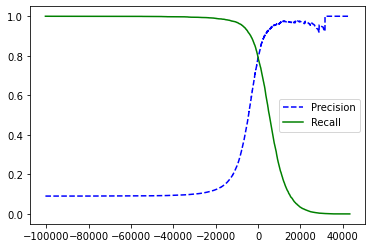

In [143]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

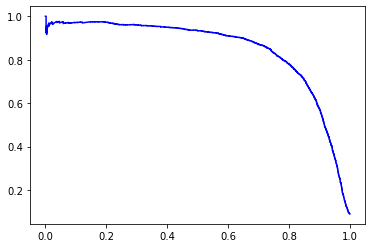

In [144]:
plt.plot(recalls, precisions, "b-")

In [145]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.9)]

In [146]:
threshold_90_precision

2969.954932186125

In [147]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [148]:
precision_score(Y_train_5, y_train_pred_90)

0.9000255689082076

In [149]:
recall_score(Y_train_5, y_train_pred_90)

0.6493266924921601

## RandomForest 

In [150]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
rnd_clf = RandomForestClassifier(random_state=1234)

In [152]:
y_prob_forest = cross_val_predict(rnd_clf, X_train, Y_train_5,
                                 cv=3,
                                 method="predict_proba")

In [153]:
y_prob_forest

array([[0.16, 0.84],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [0.03, 0.97],
       [0.91, 0.09],
       [0.96, 0.04]])

## ROC AUC  

In [156]:
from sklearn.metrics import roc_curve,roc_auc_score

### Binary classifier

In [157]:
fpr, tpr, thresholds = roc_curve(Y_train_5, y_scores)

In [159]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')

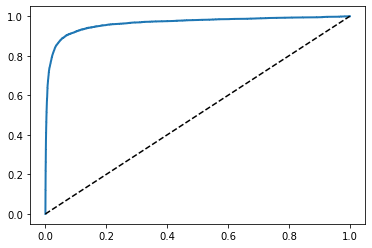

In [160]:
plot_roc_curve(fpr, tpr)

In [161]:
y_scores_forest = y_prob_forest[:, 1]

In [162]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(Y_train_5, y_scores_forest)

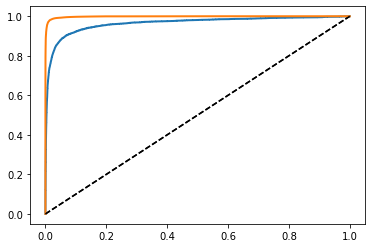

In [163]:
plot_roc_curve(fpr, tpr, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, label="Random Forest")

In [164]:
roc_auc_score(Y_train_5, y_scores_forest)

0.9983125161583396

In [166]:
rnd_clf = RandomForestClassifier(random_state=1234)
y_predict_forest = cross_val_predict(rnd_clf, X_train, Y_train_5,
                                 cv=3)

In [167]:
precision_score(Y_train_5, y_predict_forest)

0.9898862199747156

In [168]:
recall_score(Y_train_5, y_predict_forest)

0.8666297731045932

# Multic 